<a href="https://colab.research.google.com/github/dgomes03/assignments_ML/blob/main/Assignment_1_Diogo_Gomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 10/200, Loss: 23.2137
Epoch 20/200, Loss: 15.6416
Epoch 30/200, Loss: 10.6242
Epoch 40/200, Loss: 7.2839
Epoch 50/200, Loss: 5.0558
Epoch 60/200, Loss: 3.5682
Epoch 70/200, Loss: 2.5745
Epoch 80/200, Loss: 1.9104
Epoch 90/200, Loss: 1.4665
Epoch 100/200, Loss: 1.1695
Epoch 110/200, Loss: 0.9709
Epoch 120/200, Loss: 0.8379
Epoch 130/200, Loss: 0.7488
Epoch 140/200, Loss: 0.6890
Epoch 150/200, Loss: 0.6489
Epoch 160/200, Loss: 0.6219
Epoch 170/200, Loss: 0.6037
Epoch 180/200, Loss: 0.5914
Epoch 190/200, Loss: 0.5831
Epoch 200/200, Loss: 0.5775


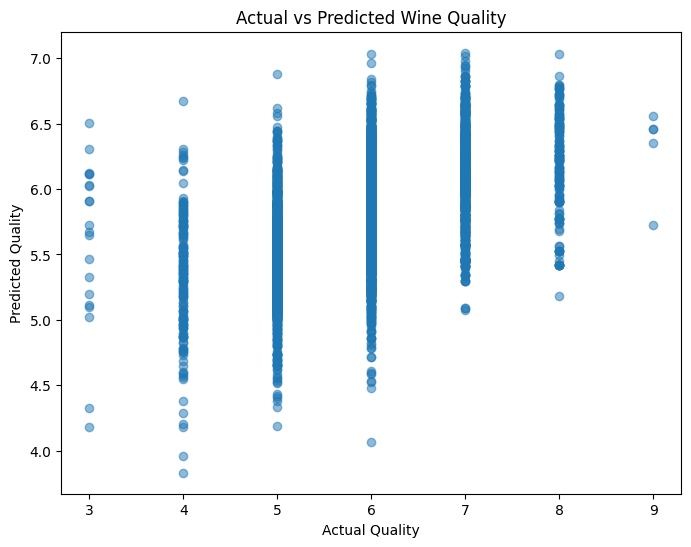

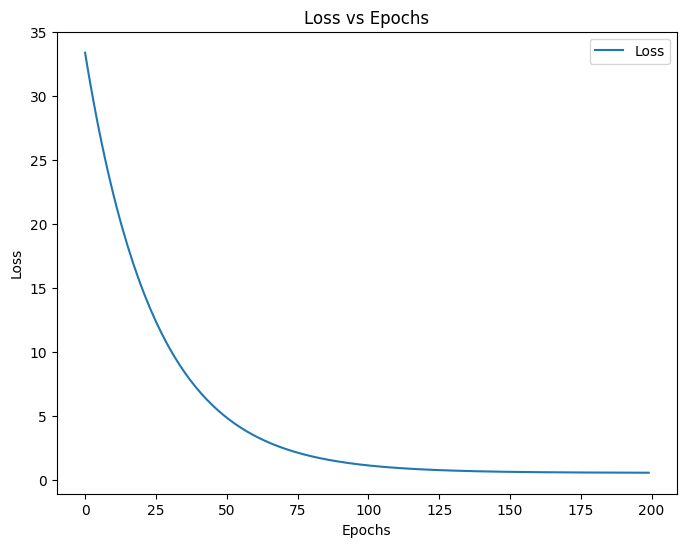

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# extract features and target
X = wine_data.drop(columns=["quality"]).values
y = wine_data["quality"].values.reshape(-1, 1)

# normalize features
scaler = StandardScaler() # this step ensures less bias to features with bigger scales.
X = scaler.fit_transform(X)

# converting to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# defining model
class WineQualityModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(WineQualityModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# defining model parameters
input_size = X.shape[1]
output_size = 1
model = WineQualityModel(input_size, output_size)

# loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# training loop
epochs = 200
loss_history = []

for epoch in range(epochs):
    # forward pass
    predictions = model(X_tensor)
    loss = loss_function(predictions, y_tensor) # loss calculation
    loss_history.append(loss.item()) # keeps record of loss value

    # backward pass
    optimizer.zero_grad() # zero_grad resets the gradients before next optimization step
    loss.backward() # "backward" computes the gradients of the loss using backpropagation
    optimizer.step()

    # print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# predictions output
with torch.no_grad(): # no gradient calculation
    y_pred = model(X_tensor).numpy()

# plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()

# plot loss vs epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()